## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cancerstudy=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")


In [2]:
cancerstudy.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [3]:
cancerstudy.shape

(1893, 8)

In [4]:
cancerstudy.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
# Checking the number of mice in the DataFrame.
mice = cancerstudy.groupby(["Mouse ID"])
mice=mice["Mouse ID"].nunique()
total_mice =len(mice)
print(f'Number of mice: {total_mice}')


Number of mice: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedresearch=pd.DataFrame(cancerstudy, columns=['Mouse ID','Timepoint'])
duplicated =duplicatedresearch[duplicatedresearch.duplicated()]
print(duplicated)

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [7]:
type(duplicated)

pandas.core.frame.DataFrame

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicateddf = cancerstudy.loc[cancerstudy["Mouse ID"]== "g989"]
duplicateddf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleancancerstudy=cancerstudy.loc[cancerstudy["Mouse ID"]!= "g989"]
cleancancerstudy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(cleancancerstudy["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

        #create statistical values of Drug Reginen
tumordatamean=cleancancerstudy.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumordatamedian=cleancancerstudy.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumordatastd=cleancancerstudy.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumordatavariance=cleancancerstudy.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumordatavsem=cleancancerstudy.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

        #create summary of statistical values of Drug Reginen
summarytumor = pd.DataFrame({"Mean":tumordatamean, "Median":tumordatamedian, "Variance":tumordatavariance, 
                             "Standard Deviation":tumordatastd, "SEM" :tumordatavsem})
        #Formating summary of statistical values of Drug Reginen
summarytumor["Mean"]=summarytumor["Mean"].map('{:.2f}'.format)
summarytumor["Median"]=summarytumor["Median"].map('{:.2f}'.format)
summarytumor["Variance"]=summarytumor["Variance"].map('{:.2f}'.format)
summarytumor["Standard Deviation"]=summarytumor["Standard Deviation"].map('{:.2f}'.format)
summarytumor["SEM"]=summarytumor["SEM"].map('{:.2f}'.format)
summarytumor



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
groupbyregimen = cleancancerstudy.groupby("Drug Regimen")
summarystats = groupbyregimen["Tumor Volume (mm3)"].agg(['mean','median','std','var','sem'])
summarystats

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Total Mice')

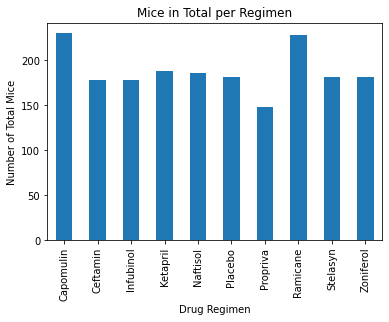

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pandas. 

totalmice=cleancancerstudy.groupby("Drug Regimen")["Mouse ID"].count()

totalmice.plot(kind='bar',title= "Mice in Total per Regimen")

plt.ylabel("Number of Total Mice")


Text(0, 0.5, 'Drug Regimen')

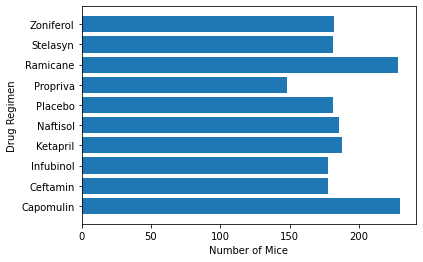

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pyplot.
plt.barh(totalmice.index,totalmice)
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")


## Pie Plots

Text(0, 0.5, 'Precentage of Mice')

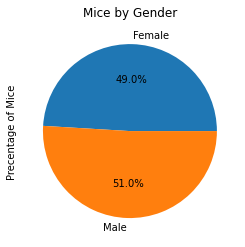

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
micegender=cleancancerstudy.groupby("Sex")["Mouse ID"].count()

micegender.plot(kind='pie',autopct="%1.1f%%",title= "Mice by Gender")
plt.ylabel("Precentage of Mice")


Text(0.5, 1.0, 'Mice by Gender')

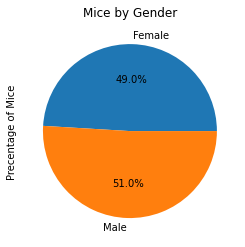

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(micegender,labels=micegender.index,autopct="%1.1f%%")
plt.ylabel("Precentage of Mice")
plt.title("Mice by Gender")


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Start by getting the last time  final tumor volumne
micetumorsize=cleancancerstudy.groupby(["Mouse ID"]).max()
biggesttumors =micetumorsize.reset_index()
biggesttumors

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,45.000000,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
#merge the biggest tumor with clear dataframe to get the tumor volume at the last time
tumorclean= biggesttumors[["Mouse ID","Timepoint"]].merge(cleancancerstudy, on=["Mouse ID","Timepoint"])

Infubinol =tumorclean.loc[tumorclean["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ramicane  =tumorclean.loc[tumorclean["Drug Regimen"] == "Ramicane" ]["Tumor Volume (mm3)"]
Ceftamin  =tumorclean.loc[tumorclean["Drug Regimen"] == "Ceftamin" ]["Tumor Volume (mm3)"]
Capomulin =tumorclean.loc[tumorclean["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

In [19]:
#Infubinol INF, Ramicane RAM, Ceftamin CEF, Capomulin CAP

        #Capomulin
print('-------------------Capomulin----------------------')
quartilesCAP = Capomulin.quantile([.25,.5,.75])
lowerqCAP = quartilesCAP[0.25]
upperqCAP = quartilesCAP[0.75]
iqrCAP = upperqCAP-lowerqCAP

print(f"The lower quartile of Capomulin is: {round(lowerqCAP,2)}")
print(f"The upper quartile of Capomulin is: {round(upperqCAP,2)}")
print(f"The interquartile range of Capomulin is: {round(iqrCAP,2)}")
print(f"The the median of Capomulin is: {round(quartilesCAP[0.5],2)} ")

lower_boundCAP = lowerqCAP - (1.5*iqrCAP)
upper_boundCAP = upperqCAP + (1.5*iqrCAP)
print(f"Values below {round(lower_boundCAP,2)} could be outliers.")
print(f"Values above {round(upper_boundCAP,2)} could be outliers.")


        #Ramicane
print('-------------------Ramicane----------------------')
quartilesRAM = Ramicane.quantile([.25,.5,.75])
lowerqRAM = quartilesRAM[0.25]
upperqRAM = quartilesRAM[0.75]
iqrRAM = upperqRAM-lowerqRAM

print(f"The lower quartile of Ramicane is: {round(lowerqRAM,2)}")
print(f"The upper quartile of Ramicane is: {round(upperqRAM,2)}")
print(f"The interquartile range of Ramicane is: {round(iqrRAM,2)}")
print(f"The the median of Ramicane is: {round(quartilesRAM[0.5],2)} ")

lower_boundRAM = lowerqRAM - (1.5*iqrRAM)
upper_boundRAM = upperqRAM + (1.5*iqrRAM)
print(f"Values below {round(lower_boundRAM,2)} could be outliers.")
print(f"Values above {round(upper_boundRAM,2)} could be outliers.")


        #Infubinol
print('-------------------Infubinol----------------------')
quartilesINF = Infubinol.quantile([.25,.5,.75])
lowerqINF = quartilesINF[0.25]
upperqINF = quartilesINF[0.75]
iqrINF = upperqINF-lowerqINF

print(f"The lower quartile of Infubinol is: {round(lowerqINF,2)}")
print(f"The upper quartile of Infubinol is: {round(upperqINF,2)}")
print(f"The interquartile range of INFomulin is: {round(iqrINF,2)}")
print(f"The the median of Infubinol is: {round(quartilesINF[0.5],2)} ")

lower_boundINF = lowerqINF - (1.5*iqrINF)
upper_boundINF = upperqINF + (1.5*iqrINF)
print(f"Values below {round(lower_boundINF,2)} could be outliers.")
print(f"Values above {round(upper_boundINF,2)} could be outliers.")


        #Ceftamin
print('-------------------Ceftamin----------------------')
quartilesCEF = Ceftamin.quantile([.25,.5,.75])
lowerqCEF = quartilesCEF[0.25]
upperqCEF = quartilesCEF[0.75]
iqrCEF = upperqCEF-lowerqCEF

print(f"The lower quartile of Ceftamin is: {round(lowerqCEF,2)}")
print(f"The upper quartile of Ceftamin is: {round(upperqCEF,2)}")
print(f"The interquartile range of Ceftamin is: {round(iqrCEF,2)}")
print(f"The the median of Ceftamin is: {round(quartilesCEF[0.5],2)} ")

lower_boundCEF = lowerqCEF - (1.5*iqrCEF)
upper_boundCEF = upperqCEF + (1.5*iqrCEF)
print(f"Values below {round(lower_boundCEF,2)} could be outliers.")
print(f"Values above {round(upper_boundCEF,2)} could be outliers.")


-------------------Capomulin----------------------
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
-------------------Ramicane----------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
-------------------Infubinol----------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of INFomulin is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
-------------------Ceftamin----------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Cefta

Text(0, 0.5, 'Tumor Size)')

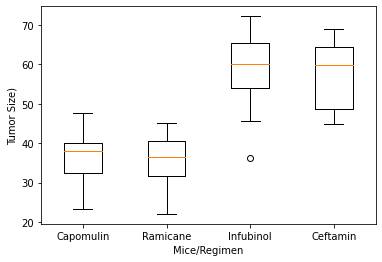

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Capomulin, Ramicane, Infubinol,Ceftamin],labels=['Capomulin', 'Ramicane','Infubinol','Ceftamin']);
plt.xlabel("Mice/Regimen")
plt.ylabel("Tumor Size)")


## Line and Scatter Plots

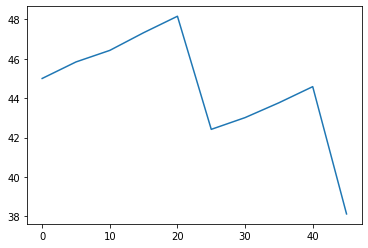

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulindf=cleancancerstudy.loc[cleancancerstudy["Drug Regimen"]=="Capomulin"]
Capomulindf
mousedf=Capomulindf.loc[Capomulindf["Mouse ID"]== "j119"]
plt.plot(mousedf["Timepoint"],mousedf["Tumor Volume (mm3)"])
plt.title="Capomulin"

Text(0, 0.5, 'Average Tumor Volume')

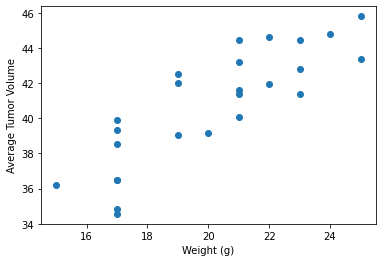

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
averagetumorvolume=Capomulindf.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mergefinal= pd.merge(mouse_metadata,averagetumorvolume, on="Mouse ID")
plt.scatter(mergefinal["Weight (g)"],mergefinal["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")


## Correlation and Regression

In [25]:
mergefinal.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
0,s185,Capomulin,Female,3,17,34.559143


In [26]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
weight = mergefinal.iloc[:,4]
tumoravg = mergefinal.iloc[:,5]
correlation = st.pearsonr(weight,tumoravg)
print(f"The correlation between weight and tumor average is {round(correlation[0],2)}")

The correlation between weight and tumor average is 0.84


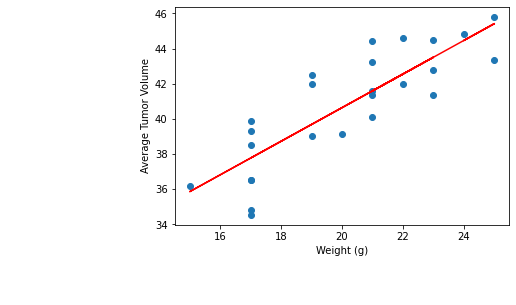

In [28]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
xvalues = mergefinal['Weight (g)']
yvalues = mergefinal['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regressionvalues = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regressionvalues,"r-")
plt.annotate(line_eq,(9,30),fontsize=15,color="black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

In [29]:
print(line_eq)

y = 0.95x + 21.55
